In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import KFold, cross_val_score

# from sklearn.model_selection import cross_val_score

# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import warnings
warnings.filterwarnings('ignore')
from joblib import dump #Save

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
%config InlineBackend.figure_format = 'retina'

---
## 인코딩 별 데이터

In [95]:
# data_int = pd.read_csv('../dataset/app_int.csv') # Integer Encoding
# data_bin = pd.read_csv('../dataset/app_bin.csv') # Binary Encoding
data_dum = pd.read_csv('../dataset/app_dum.csv') # One Hot Encoding

In [96]:
# data_cat = pd.read_excel('../dataset/appstore.xlsx')
# data_cat

In [97]:
# data_int.info()

In [98]:
# data_bin.info()

In [99]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546056 entries, 0 to 546055
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       546056 non-null  int64  
 1   Available_Age                    546056 non-null  int64  
 2   Size                             546056 non-null  int64  
 3   Price                            546056 non-null  int64  
 4   Free                             546056 non-null  bool   
 5   Rating                           546056 non-null  float64
 6   Reviews                          546056 non-null  int64  
 7   Category_Book                    546056 non-null  bool   
 8   Category_Business                546056 non-null  bool   
 9   Category_Developer Tools         546056 non-null  bool   
 10  Category_Education               546056 non-null  bool   
 11  Category_Entertainment           546056 non-null  bool   
 12  Ca

### 데이터 살펴보기

- Reviews가 rating count로 이어지는지 확인 > X (평점을 주고 리뷰를 쓰지 않을 수 있음.)
- 평점은 1 to 5 까지 줄 수 있음.

- 각 데이터 분포 시각화(데이터 구간별 정리 고려)

In [100]:
# data_cat.info()

In [101]:
# data_int.columns

In [102]:
# plt.figure(figsize=(8,6))
# sns.heatmap(data_cat.drop(['Category', 'Unnamed: 0', 'Free'], axis=1).corr(), cmap='Greens')
# plt.title('변수 간 상관관계')
# plt.show()

In [103]:
# cols =['Category','Available_Age', 'Reviews','Size', 'Price', 'Rating']
# cols_skewed = ['Size', 'Price', 'Reviews','Rating']

# # data 사이즈가 너무 커서 샘플추출
# sampled_data_cat = data_cat.sample(frac=0.2)
# # 구간 설정
# n_bins = 100 

# for col in cols:
#     plt.figure(figsize=(11, 4))
#     if col in cols_skewed:
#         data_to_plot = np.log1p(sampled_data_cat[col])
#         plt.title(f'{col} 분포(Log변환)')
#         plt.xticks(rotation=70)
#         sns.histplot(data_to_plot, bins=n_bins)
#     elif col == 'Available_Age':
#         data_to_plot = np.log1p(sampled_data_cat[col])
#         plt.title(f'{col} 분포(Log변환)')
#         plt.xticks(rotation=70)
#         sns.histplot(data_to_plot, bins=6)
#     else:
#         data_to_plot = sampled_data_cat[col]
#         plt.title(f'{col} 분포')
#         plt.xticks(rotation=70)
#         sns.histplot(data_to_plot, bins=n_bins)
    
#     plt.show()

---
## Feature 조정
- #### Outlier 제거
- #### log 변환

### 2. log 변환 후 모델링

In [104]:
data_dum

,Unnamed: 0,Available_Age,Size,Price,Free,Rating,Reviews,Category_Book,Category_Business,Category_Developer Tools,...,Category_Photo & Video,Category_Productivity,Category_Reference,Category_Shopping,Category_Social Networking,Category_Sports,Category_Stickers,Category_Travel,Category_Utilities,Category_Weather
0,1,1,13,0,True,5.00,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,4,25,0,True,4.78,1285,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11,4,60,0,True,4.79,1839,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12,1,3,2,False,4.67,242,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,4,2,1,False,3.10,21,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546051,1230360,1,39,0,True,5.00,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546052,1230368,1,92,0,True,4.43,7,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546053,1230371,1,16,0,True,3.92,143,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546054,1230372,1,37,0,True,4.83,1500,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [105]:
# cols =['Available_Age', 'Reviews', 'Size', 'Price', 'Rating']
cols_skewed = ['Size', 'Price', 'Reviews','Rating']
cols_skewed_nonzero = ['Size','Rating']

In [106]:
for col in cols_skewed:
    if col in cols_skewed_nonzero:
        data_dum[col] = np.log(data_dum[col])
    else:
        data_dum[col] = np.log1p(data_dum[col])

data_dum

,Unnamed: 0,Available_Age,Size,Price,Free,Rating,Reviews,Category_Book,Category_Business,Category_Developer Tools,...,Category_Photo & Video,Category_Productivity,Category_Reference,Category_Shopping,Category_Social Networking,Category_Sports,Category_Stickers,Category_Travel,Category_Utilities,Category_Weather
0,1,1,2.564949,0.000000,True,1.609438,0.693147,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,4,3.218876,0.000000,True,1.564441,7.159292,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11,4,4.094345,0.000000,True,1.566530,7.517521,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12,1,1.098612,1.098612,False,1.541159,5.493061,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,4,0.693147,0.693147,False,1.131402,3.091042,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546051,1230360,1,3.663562,0.000000,True,1.609438,0.693147,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546052,1230368,1,4.521789,0.000000,True,1.488400,2.079442,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546053,1230371,1,2.772589,0.000000,True,1.366092,4.969813,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546054,1230372,1,3.610918,0.000000,True,1.574846,7.313887,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [107]:
data_dum['Size'].replace([np.inf, -np.inf], np.nan, inplace=True)
data_dum['Size'].fillna(0, inplace=True)

In [108]:
data_dum.reset_index(drop=True, inplace=True)

In [109]:
data_dum

,Unnamed: 0,Available_Age,Size,Price,Free,Rating,Reviews,Category_Book,Category_Business,Category_Developer Tools,...,Category_Photo & Video,Category_Productivity,Category_Reference,Category_Shopping,Category_Social Networking,Category_Sports,Category_Stickers,Category_Travel,Category_Utilities,Category_Weather
0,1,1,2.564949,0.000000,True,1.609438,0.693147,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,4,3.218876,0.000000,True,1.564441,7.159292,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11,4,4.094345,0.000000,True,1.566530,7.517521,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12,1,1.098612,1.098612,False,1.541159,5.493061,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,4,0.693147,0.693147,False,1.131402,3.091042,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546051,1230360,1,3.663562,0.000000,True,1.609438,0.693147,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546052,1230368,1,4.521789,0.000000,True,1.488400,2.079442,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546053,1230371,1,2.772589,0.000000,True,1.366092,4.969813,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546054,1230372,1,3.610918,0.000000,True,1.574846,7.313887,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [110]:
data_dum['Free'] = data_dum['Free'].apply(lambda x: 0 if x else 1)

In [111]:
# feature, target 설정
X = data_dum.drop(['Unnamed: 0', 'Rating'], axis=1) # feature 다섯개
y = data_dum['Rating']

In [112]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [113]:
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()
scaler_rob = RobustScaler()

In [114]:
# train 데이터 스케일링
# X_train_std_scaled = scaler_std.fit_transform(X_train)
# X_train_mm_scaled = scaler_mm.fit_transform(X_train)
X_train = scaler_rob.fit_transform(X_train)

In [115]:
# test 데이터 스케일링 fit_transform 조심
# X_test_std_scaled = scaler_std.transform(X_test)
# X_test_mm_scaled = scaler_mm.transform(X_test)
X_test = scaler_rob.transform(X_test)

## 스케일러 결정

In [116]:
X1 = data_dum.drop(['Unnamed: 0', 'Rating','Category_Book',
       'Category_Business', 'Category_Developer Tools', 'Category_Education',
       'Category_Entertainment', 'Category_Finance', 'Category_Food & Drink',
       'Category_Games', 'Category_Graphics & Design',
       'Category_Health & Fitness', 'Category_Lifestyle',
       'Category_Magazines & Newspapers', 'Category_Medical', 'Category_Music',
       'Category_Navigation', 'Category_News', 'Category_Photo & Video',
       'Category_Productivity', 'Category_Reference', 'Category_Shopping',
       'Category_Social Networking', 'Category_Sports', 'Category_Stickers', # 스케일러를 결정하기 위해서.
       'Category_Travel', 'Category_Utilities', 'Category_Weather'], axis=1) # feature 다섯개
y1 = data_dum['Rating']

In [117]:
graph_std_scaler = StandardScaler().fit_transform(X1)
graph_minmax_scaler = MinMaxScaler().fit_transform(X1)
graph_robust_scaler = RobustScaler().fit_transform(X1)

graph_std_scaled_df = pd.DataFrame(graph_std_scaler, columns=X1.columns)
graph_minmax_scaled_df = pd.DataFrame(graph_minmax_scaler, columns=X1.columns)
graph_robust_scaled_df = pd.DataFrame(graph_robust_scaler, columns=X1.columns)

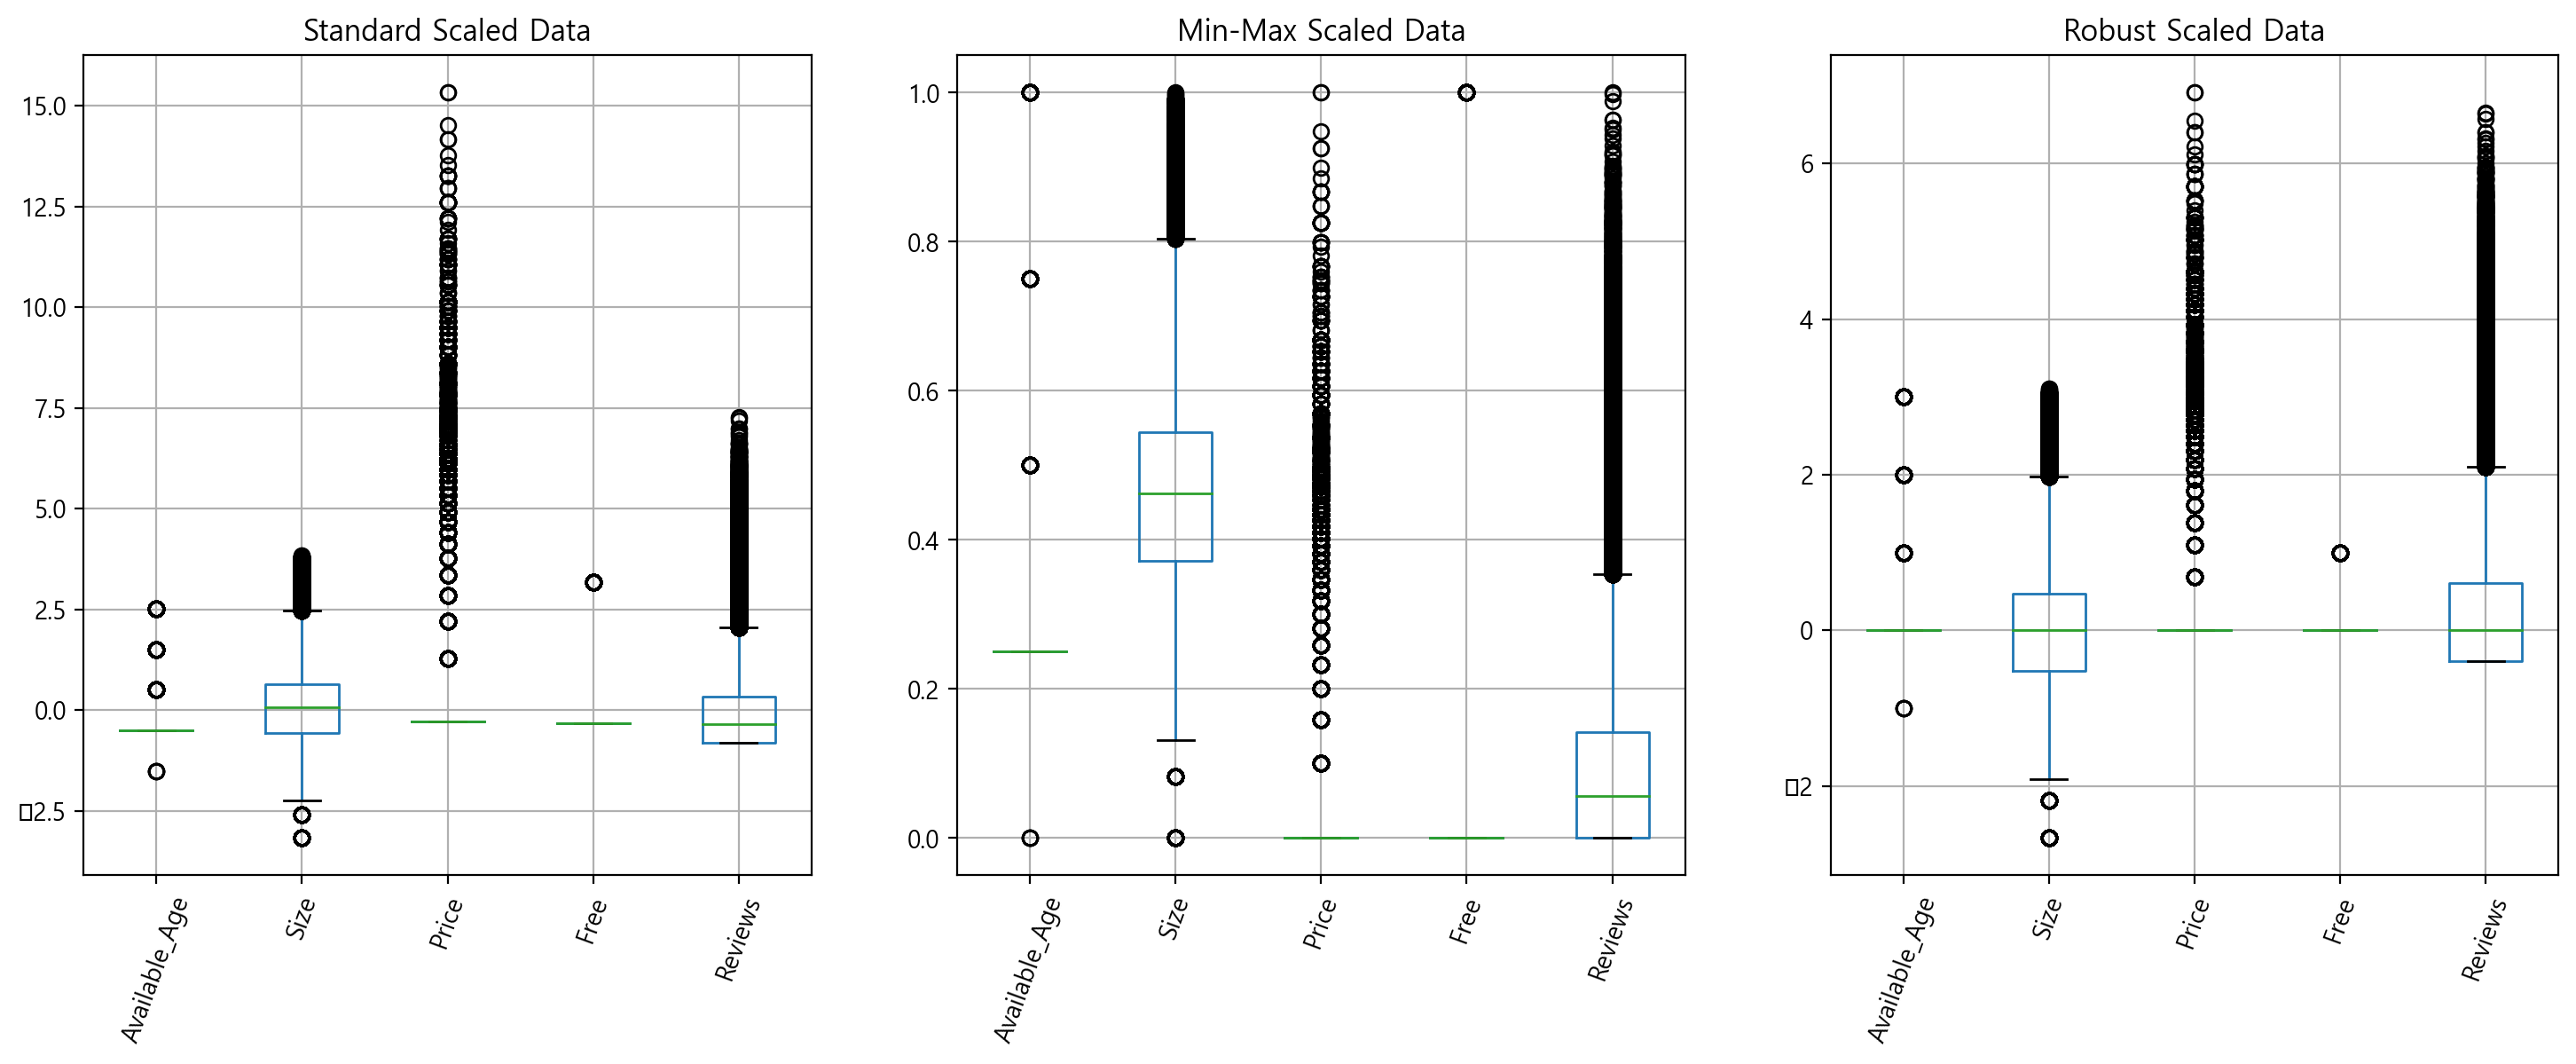

In [118]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Standard Scaled Data')
graph_std_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.subplot(1, 3, 2)
plt.title('Min-Max Scaled Data')
graph_minmax_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.subplot(1, 3, 3)
plt.title('Robust Scaled Data')
graph_robust_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.show()

## 모델준비

In [119]:
# 모델 준비
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
DTR_model = DecisionTreeRegressor()
GBR_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
LGBM_model = LGBMRegressor()

In [120]:
# fitting
LR_model.fit(X_train, y_train)

LinearRegression()

In [121]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [123]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [124]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [125]:
LGBM_model.fit(X_train, y_train)

LGBMRegressor()

In [126]:
# 예측
y_pred_lr = LR_model.predict(X_test)
y_pred_rfr = RFR_model.predict(X_test)
y_pred_dtr = DTR_model.predict(X_test)
y_pred_gbr = GBR_model.predict(X_test)
y_pred_xgb = XGB_model.predict(X_test)
y_pred_lgbm = LGBM_model.predict(X_test)

In [127]:
# Linear Regressor
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
# RandomForest Regressor
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
# DecisionTreeRegressor
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
# Gradient Boosting Regressor
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
# XGBoosting Regressor
rmse_xgb = mean_squared_error(y_test,y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# LigthGBM Regressor
rmse_lgbm = mean_squared_error(y_test,y_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

In [128]:
metrics = {
    'Linear Reg': {'MAE': mae_lr, 'MSE':mse_lr,'RMSE':rmse_lr},
    'Random Forest Reg': {'MAE': mae_rfr, 'MSE':mse_rfr,'RMSE': rmse_rfr},
    'Decision Tree Reg': {'MAE': mae_dtr, 'MSE':mse_dtr,'RMSE': rmse_dtr},
    'Gradient Boosting Reg': {'MAE': mae_gbr, 'MSE':mse_gbr,'RMSE': rmse_gbr},
    'XGBoost Reg': {'MAE': mae_xgb, 'MSE':mse_xgb,'RMSE': rmse_xgb},
    'LightGBM Reg': {'MAE': mae_lgbm, 'MSE':mse_lgbm,'RMSE': rmse_lgbm}
}
result = pd.DataFrame(metrics).round(3).T
result

,MAE,MSE,RMSE
Linear Reg,0.304,0.180,0.424
Random Forest Reg,0.309,0.197,0.444
Decision Tree Reg,0.328,0.231,0.480
Gradient Boosting Reg,0.300,0.177,0.420
XGBoost Reg,0.296,0.175,0.418
LightGBM Reg,0.297,0.175,0.419


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


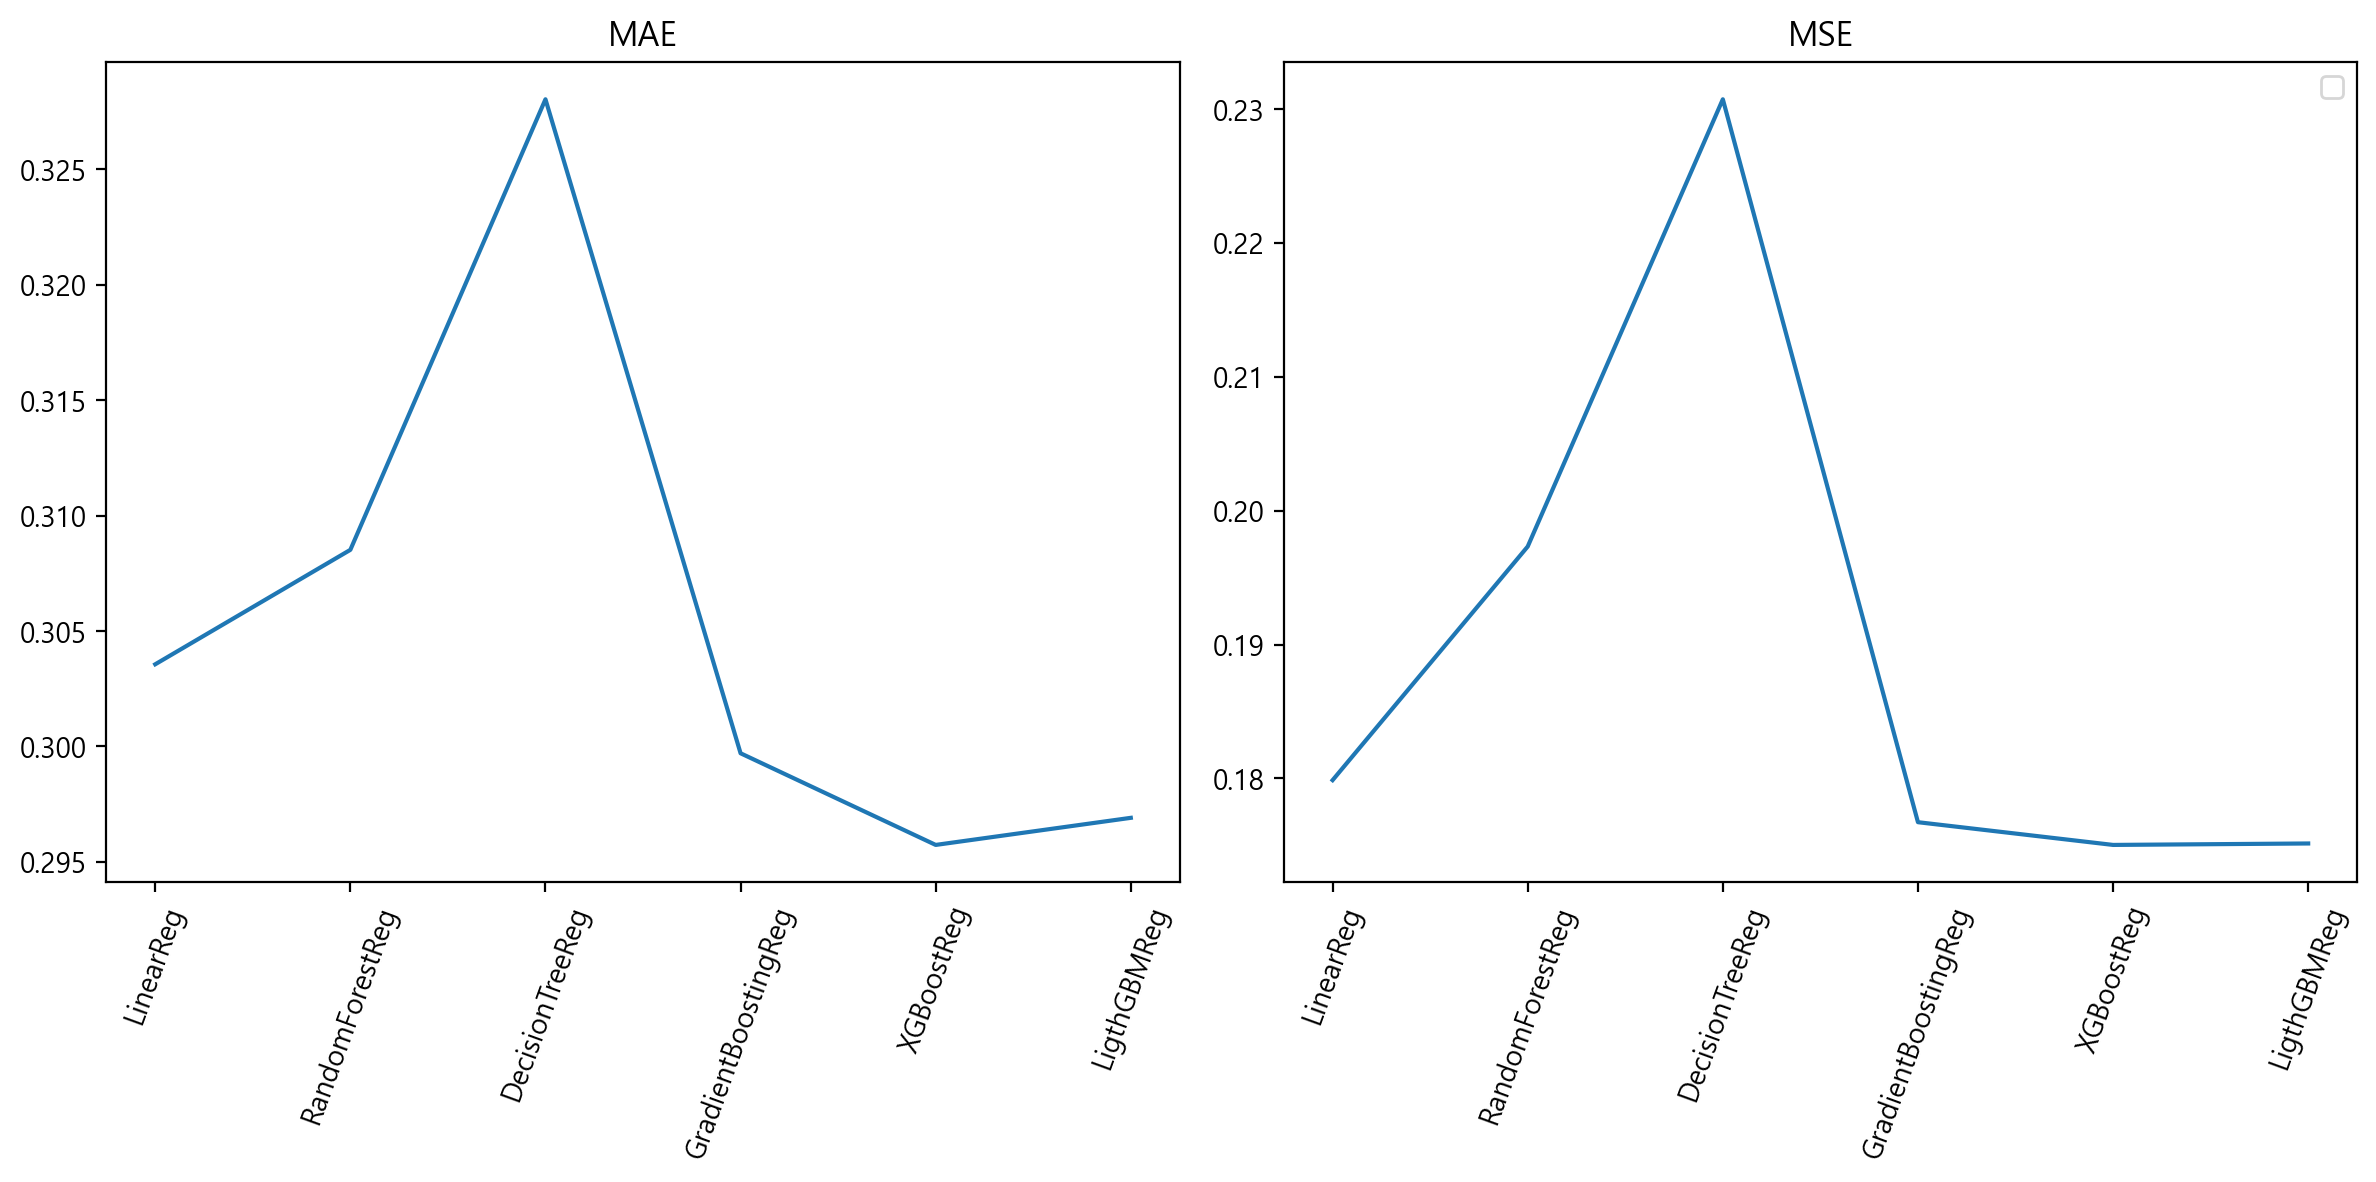

In [129]:
model_list = ['LinearReg','RandomForestReg','DecisionTreeReg', 'GradientBoostingReg', 'XGBoostReg', 'LigthGBMReg']
mae_list = [mae_lr,mae_rfr,mae_dtr,mae_gbr, mae_xgb, mae_lgbm]
rmse = [rmse_lr,rmse_rfr,rmse_dtr,rmse_gbr, rmse_xgb, rmse_lgbm]
mse_list = [mse_lr,mse_rfr,mse_dtr,mse_gbr, mse_xgb, mse_lgbm]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(model_list,mae_list)
plt.title('MAE')
plt.xticks(rotation=70)

plt.subplot(1,2,2)
plt.plot(model_list, mse_list)
plt.title('MSE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.legend()
plt.show()

In [130]:
# 교차 검증 
kf = KFold(n_splits=5,shuffle=True)
# rmse_total = 0
mse_total=0
mae_total=0

for train, valid in kf.split(X):
    X_train, X_valid = X.iloc[train], X.iloc[valid]
    y_train, y_valid = y.iloc[train], y.iloc[valid]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    # rmse = mean_squared_error(y_vaild, y_pred, squared=False)
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)

    # rmse_total += rmse
    mse_total += mse
    mae_total += mae

    # print(f'RMSE : {rmse:.3f} / ', end='')
    print(f'MAE : {mae:.3f} / ', end='')
    print(f'MSE : {mse:.3f}')

# print(f'RMSE Avg : {rmse_total/5}')
print(f'MSE Avg : {mse_total/5:.3f}')
print(f'MAE Avg : {mae_total/5:.3f}')

MAE : 0.296 / MSE : 0.175
MAE : 0.295 / MSE : 0.174
MAE : 0.295 / MSE : 0.174
MAE : 0.296 / MSE : 0.175
MAE : 0.295 / MSE : 0.173
MSE Avg : 0.174
MAE Avg : 0.295


In [131]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mse_scores = -cross_val_score(XGB_model, X, y, cv=5, scoring=mse_scorer)
mae_scores = -cross_val_score(XGB_model, X, y, cv=5, scoring=mae_scorer)

print(mse_scores)
print(mae_scores)

[0.18197245 0.17366253 0.1572904  0.1650104  0.20141368]
[0.30372124 0.29431747 0.27627564 0.28595642 0.32723843]


In [132]:
param_range = {
    'n_estimators': randint(100, 500),  
    'max_depth': randint(3, 10),        
    'learning_rate': uniform(0.01, 0.5)
}

In [133]:
model = XGBRegressor()

randomsearch = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_range, 
    n_iter=10,  # sampling 할 횟수
    cv=5, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    verbose=2, # 출력방식선택
    random_state=42
)

randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024000219760>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002406988C850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024000219340>},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [134]:
print(f'Best Parameters : {randomsearch.best_params_}')
print(f'Best Score : {randomsearch.best_score_}')

Best Parameters : {'learning_rate': 0.03820578951355013, 'max_depth': 6, 'n_estimators': 393}
Best Score : -0.29813814612116385


In [135]:
XGB_tuned = XGBRegressor(learning_rate=0.03820578951355013,max_depth=6, n_estimators=393)
XGB_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03820578951355013,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=393, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [136]:
y_pred_tuned = XGB_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
# rmse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f'MSE_Tuned : {mse_tuned}')
print(f'MAE_Tuned : {mae_tuned}')
# print(f'RMSE_Tuned : {rmse_tuned}')

MSE_Tuned : 0.1924011896173484
MAE_Tuned : 0.33667313769446844


In [137]:
result = {
    'XGB_before': {'MSE': mse_gbr, 'MAE': mae_gbr},
    'XGB_tuned': {'MSE': mse_tuned,'MAE': mae_tuned}  #'RMSE' : rmse_xgb 'RMSE' : rmse_tun
}
res = pd.DataFrame(result).round(3)
res

,XGB_before,XGB_tuned
MSE,0.177,0.192
MAE,0.300,0.337


In [138]:
XGB_tuned.feature_importances_


array([0.00915345, 0.010218  , 0.01121977, 0.34657595, 0.03151029,
       0.00734309, 0.02287145, 0.0058308 , 0.0140804 , 0.01108277,
       0.00597561, 0.0445123 , 0.05114923, 0.00508315, 0.02083679,
       0.02575831, 0.00277878, 0.00323005, 0.02026512, 0.04867906,
       0.00365788, 0.0681612 , 0.00401055, 0.00508346, 0.07045418,
       0.00787929, 0.0041486 , 0.04425201, 0.03494523, 0.05267942,
       0.00657389], dtype=float32)

In [139]:
col_list = data_dum.columns
type(col_list)

pandas.core.indexes.base.Index

In [141]:
col_list = col_list.drop(['Rating', 'Unnamed: 0'])

In [143]:
important_fea = pd.Series(XGB_tuned.feature_importances_, index=col_list)

# 중요도
top7 = important_fea.sort_values(ascending=False)[:7]
print(top7)

Free                      0.346576
Category_Shopping         0.070454
Category_Photo & Video    0.068161
Category_Utilities        0.052679
Category_Games            0.051149
Category_Navigation       0.048679
Category_Food & Drink     0.044512
dtype: float32


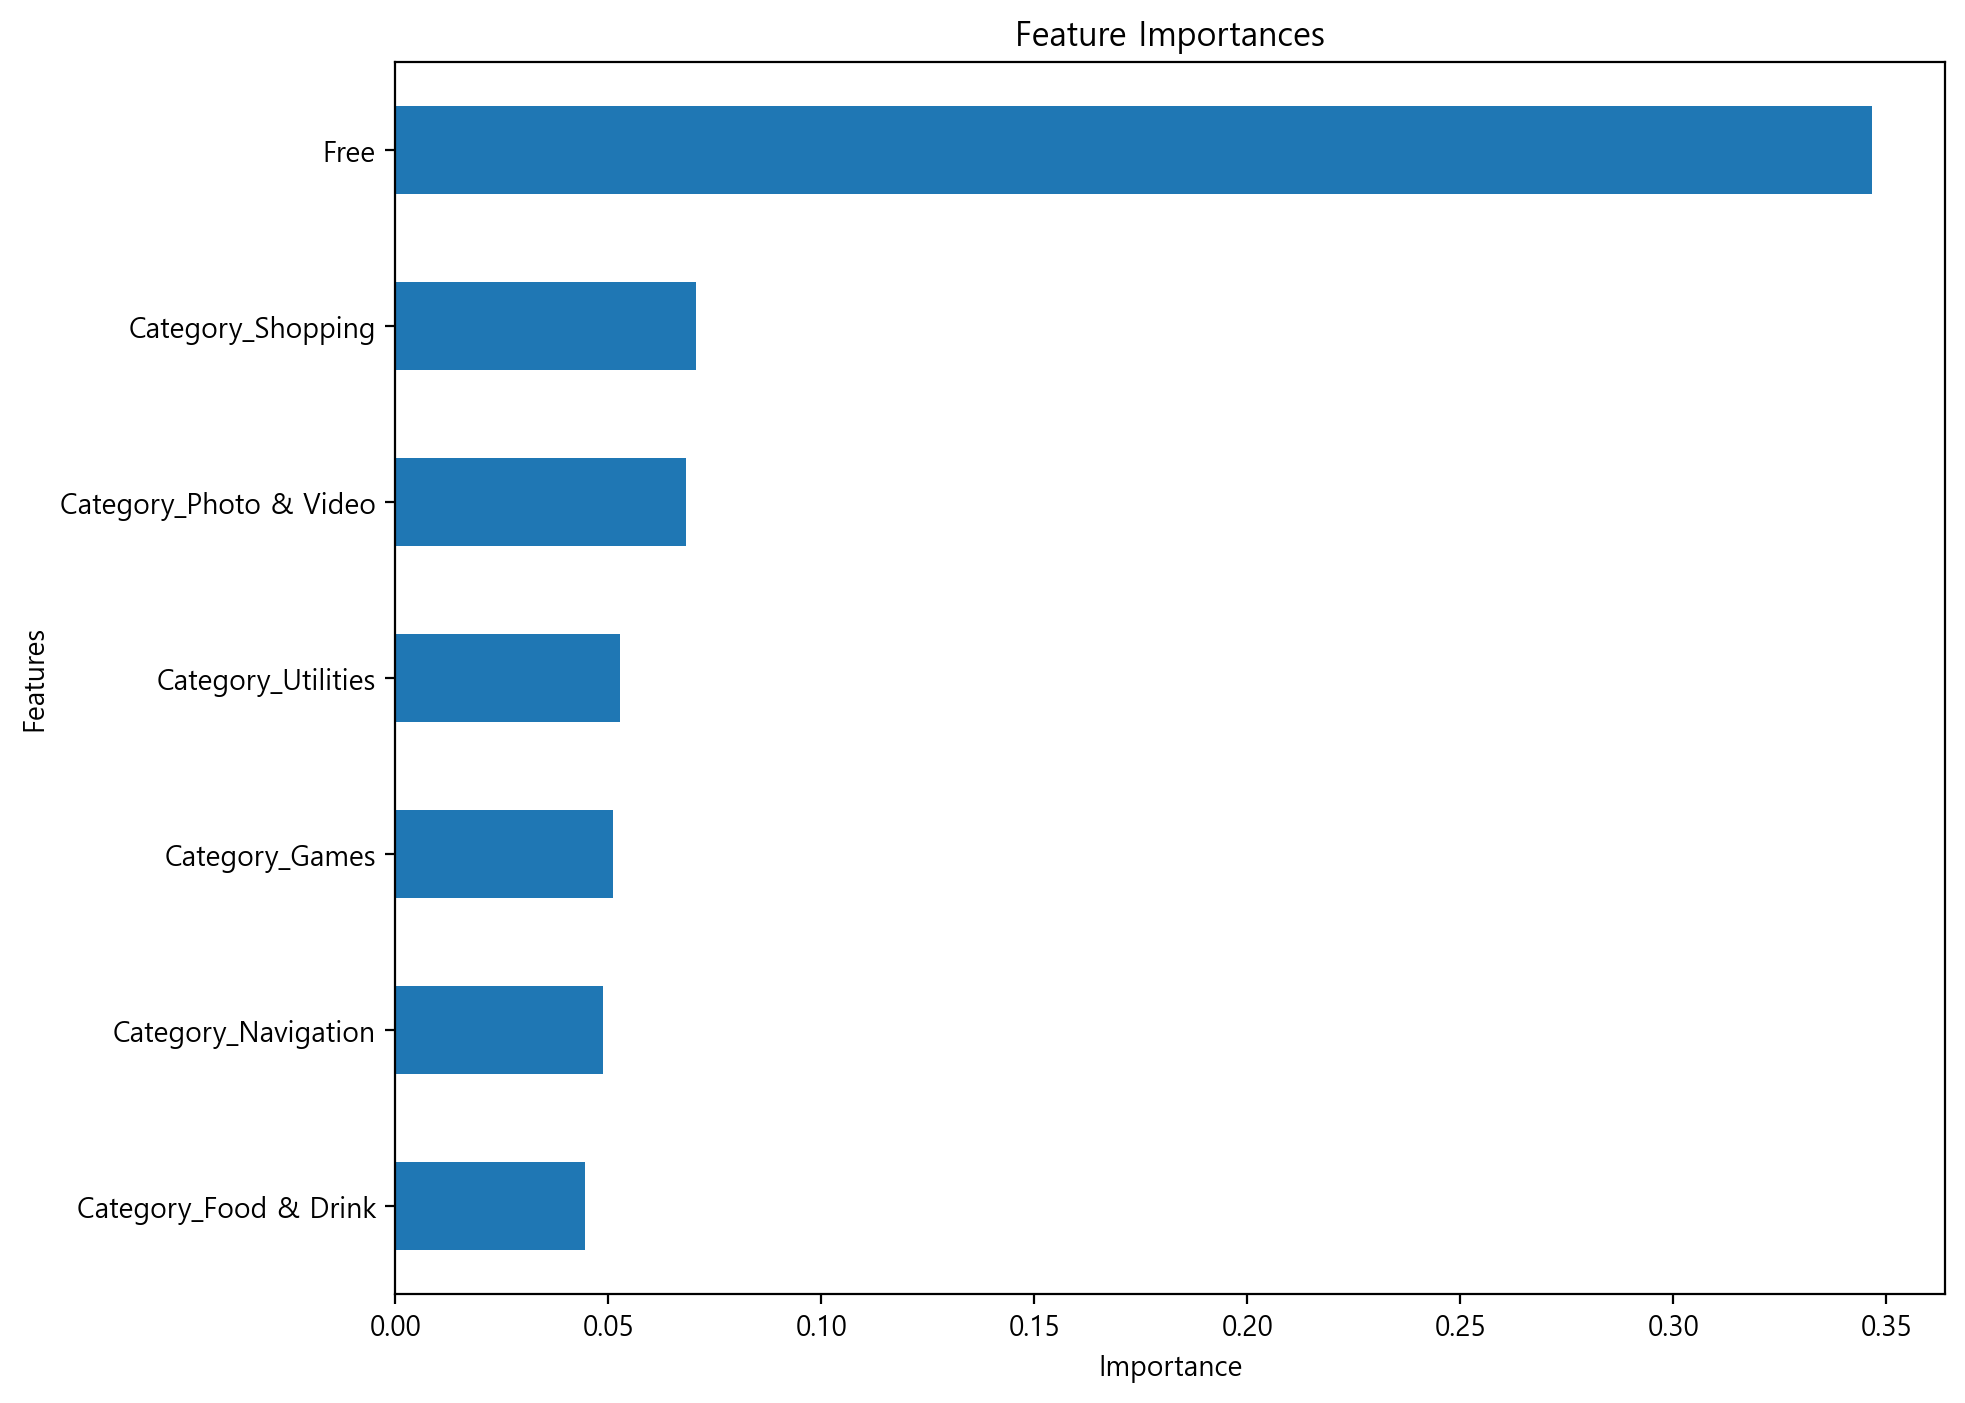

In [144]:
plt.figure(figsize=(10, 8))
top7.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()